<a href="https://colab.research.google.com/github/beyzoskaya/ClassificationCIFAR10/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x))
])

In [3]:
cifar10_full = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transform)

100%|██████████| 170498071/170498071 [00:05<00:00, 29405182.25it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [4]:
total_size = len(cifar10_full)
total_size

50000

In [5]:
class_indices = [[] for _ in range(10)]
for i, (image,label) in enumerate(cifar10_full):
  class_indices[label].append(i)

In [6]:
from torch.utils.data import Subset
import random

train_size_per_class = 600
val_size_per_class = 200
test_size_per_class = 200

train_indices = []
val_indices = []
test_indices = []

for indices in class_indices:
  random.shuffle(indices)
  train_indices.extend(indices[:train_size_per_class])
  val_indices.extend(indices[train_size_per_class:train_size_per_class + val_size_per_class])
  test_indices.extend(indices[train_size_per_class + val_size_per_class:train_size_per_class + val_size_per_class + test_size_per_class])

cifar10_train = Subset(cifar10_full, train_indices)
cifar10_val = Subset(cifar10_full, val_indices)
cifar10_test = Subset(cifar10_full, test_indices)

In [7]:
len(cifar10_train), len(cifar10_val), len(cifar10_test)

(6000, 2000, 2000)

In [8]:
from collections import Counter
def count_images_per_class(dataset):
  return Counter(sample[1] for sample in dataset)

images_per_class_train = count_images_per_class(cifar10_train)
images_per_class_val = count_images_per_class(cifar10_val)
images_per_class_test = count_images_per_class(cifar10_test)

print("Number of images per class in the train set:")
for class_label, count in images_per_class_train.items():
    print(f"Class {class_label}: {count} images")

print("\nNumber of images per class in the validation set:")
for class_label, count in images_per_class_val.items():
    print(f"Class {class_label}: {count} images")

print("\nNumber of images per class in the test set:")
for class_label, count in images_per_class_test.items():
    print(f"Class {class_label}: {count} images")

Number of images per class in the train set:
Class 0: 600 images
Class 1: 600 images
Class 2: 600 images
Class 3: 600 images
Class 4: 600 images
Class 5: 600 images
Class 6: 600 images
Class 7: 600 images
Class 8: 600 images
Class 9: 600 images

Number of images per class in the validation set:
Class 0: 200 images
Class 1: 200 images
Class 2: 200 images
Class 3: 200 images
Class 4: 200 images
Class 5: 200 images
Class 6: 200 images
Class 7: 200 images
Class 8: 200 images
Class 9: 200 images

Number of images per class in the test set:
Class 0: 200 images
Class 1: 200 images
Class 2: 200 images
Class 3: 200 images
Class 4: 200 images
Class 5: 200 images
Class 6: 200 images
Class 7: 200 images
Class 8: 200 images
Class 9: 200 images


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    random_indices = np.random.choice(len(dataset), num_images, replace=False)

    for i, idx in enumerate(random_indices):
        image, label = dataset[idx]


        image = image.view(3, 32, 32).numpy()
        image = np.transpose(image, (1, 2, 0))

        image = (image - image.min()) / (image.max() - image.min())

        axes[i].imshow(image)
        axes[i].set_title(f"Class: {label}")
        axes[i].axis('off')

    plt.show()


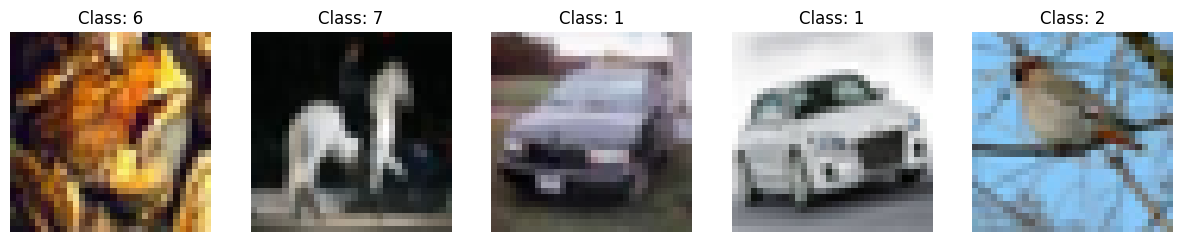

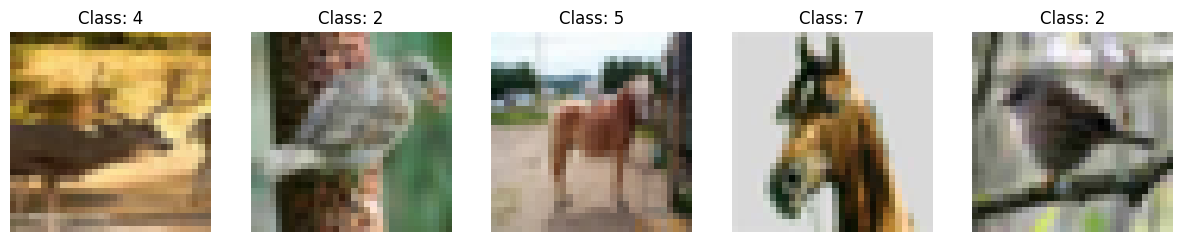

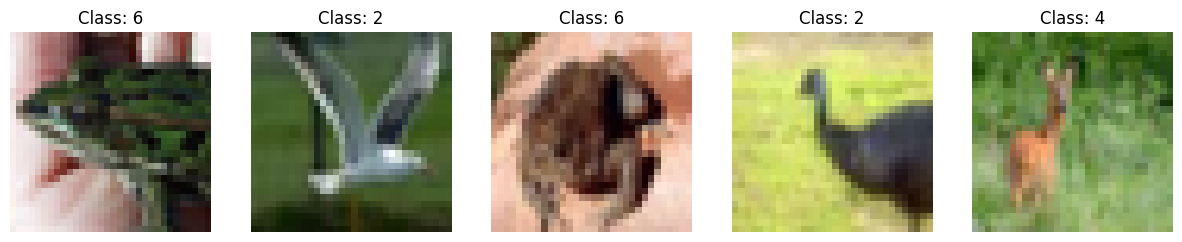

In [10]:
show_images(cifar10_train)
show_images(cifar10_val)
show_images(cifar10_test)

In [11]:
class_names = cifar10_full.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [53]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [54]:
def dataset_to_numpy(dataset):
    X, y = [], []
    for image, label in dataset:
        X.append(image.numpy())
        y.append(label)
    return np.array(X), np.array(y)

In [55]:
X_train, y_train = dataset_to_numpy(cifar10_train)
X_val, y_val = dataset_to_numpy(cifar10_val)
X_test, y_test = dataset_to_numpy(cifar10_test)

In [56]:
print("Datatype of X_train:", X_train.dtype)
print("Datatype of y_train:", y_train.dtype)
print("Datatype of X_val:", X_val.dtype)
print("Datatype of y_val:", y_val.dtype)
print("Datatype of X_test:", X_test.dtype)
print("Datatype of y_test:", y_test.dtype)

Datatype of X_train: float32
Datatype of y_train: int64
Datatype of X_val: float32
Datatype of y_val: int64
Datatype of X_test: float32
Datatype of y_test: int64


In [57]:
tree_classifier = tree.DecisionTreeClassifier(max_depth=15)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

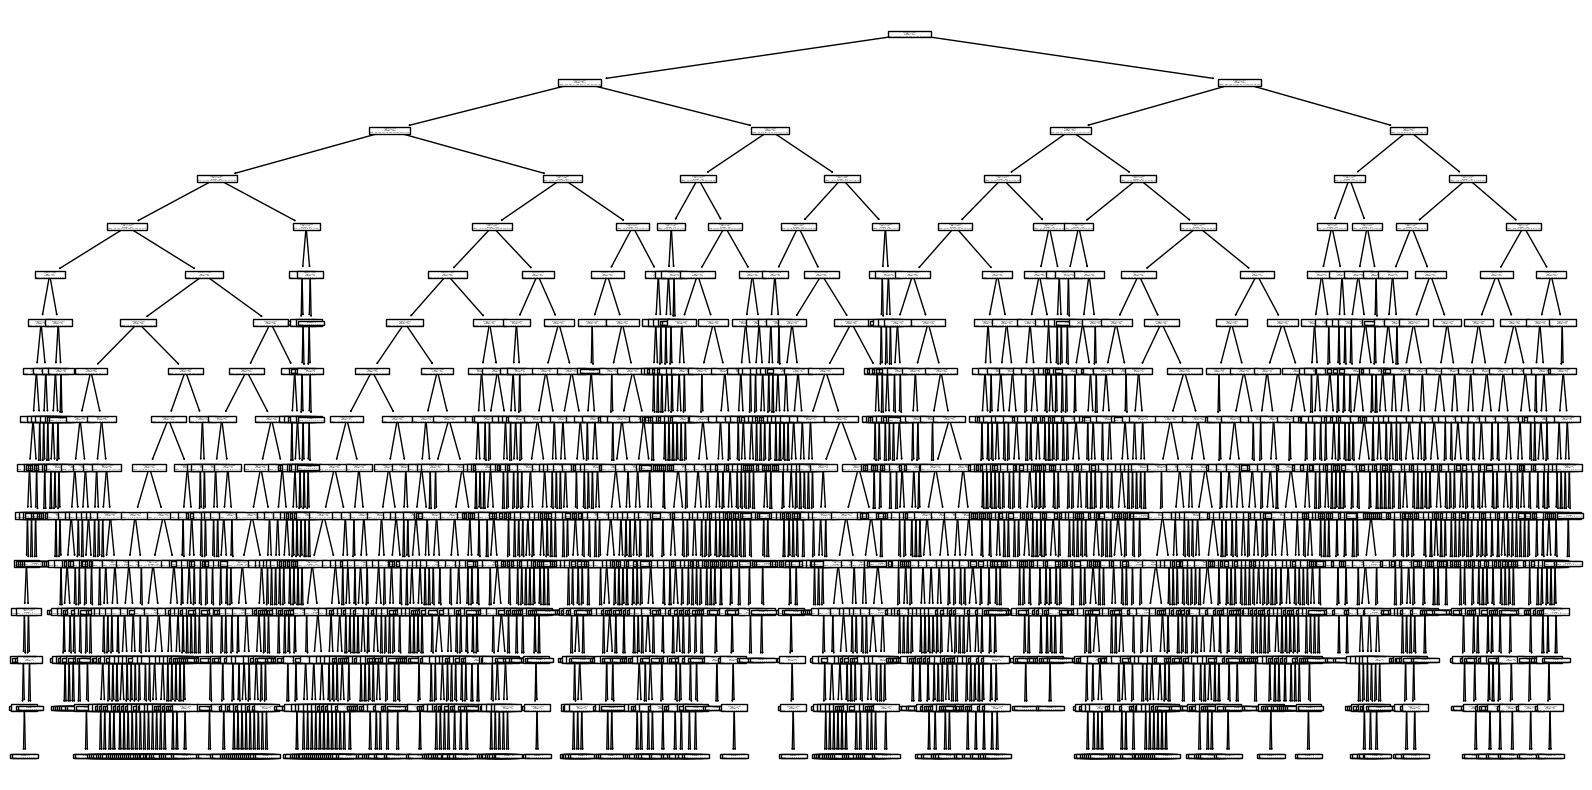

In [63]:
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_classifier)
plt.show()

In [17]:
y_pred_val = tree_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 0.24


In [18]:
y_pred_test = tree_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.24


Tried for Random Forest for comparison

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_val = forest_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
y_pred_test = forest_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Random Forest Validation Accuracy: {val_accuracy:.2f}")
print(f"Random Forest Test Accuracy: {test_accuracy:.2f}")


Random Forest Validation Accuracy: 0.39
Random Forest Test Accuracy: 0.39


Tried with PCA implementation of Decision Tree

In [20]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

n_components = 50

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

tree_classifier = DecisionTreeClassifier(max_depth=15)
tree_classifier.fit(X_train_pca, y_train)

y_pred_val = tree_classifier.predict(X_val_pca)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy after PCA: {val_accuracy:.2f}')

y_pred_test = tree_classifier.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy after PCA: {test_accuracy:.2f}')


Validation Accuracy after PCA: 0.23
Test Accuracy after PCA: 0.22


Tried with PCA implementation of Random Forest

In [21]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

n_components = 50

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

forest_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
forest_model.fit(X_train, y_train)
val_accuracy = accuracy_score(y_val, y_pred_val)
y_pred_test = forest_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Random Forest PCA Validation Accuracy: {val_accuracy:.2f}")
print(f"Random Forest PCA Test Accuracy: {test_accuracy:.2f}")


Random Forest PCA Validation Accuracy: 0.23
Random Forest PCA Test Accuracy: 0.40


Class DecisionTree -Tried-

In [22]:
from torch.utils.data import DataLoader
BATCH_SIZE = 8

train_dataloader = DataLoader(cifar10_train,
                              batch_size=BATCH_SIZE,
                              num_workers=2,
                              shuffle=True)
val_dataloader = DataLoader(cifar10_val,
                            batch_size=BATCH_SIZE,
                            num_workers=2,
                            shuffle=False)

test_dataloader = DataLoader(cifar10_test,
                            batch_size=BATCH_SIZE,
                            num_workers=2,
                            shuffle=False)

In [61]:
import torch
from collections import Counter

class DecisionTree:
    def __init__(self, num_classes, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.classes = torch.arange(num_classes)
        self.tree = None

    def fit(self, X, y, depth=0):
      y = torch.tensor(y) if not isinstance(y, torch.Tensor) else y
      if depth == 0:
          self.classes = torch.unique(y)
          print(f"Classes: {self.classes}")

      self.unique_classes, self.counts = torch.unique(y, return_counts=True)
      print(f"Unique classes inside fit function: {self.unique_classes}, counts inside fit function: {self.counts}")

      if len(self.unique_classes) == 1:
          print("Is unique class 1?")
          return {'class': self.unique_classes.item()}

      if self.max_depth is not None and depth == self.max_depth:
          majority_class = self.get_majority_class()
          return {'class': majority_class}

      if len(X) <= self.min_samples_split:
          majority_class = self.get_majority_class()
          return {'class': majority_class}

      best_split = self.find_best_split(X, y)
      if best_split is None:
          majority_class = self.get_majority_class()
          return {'class': majority_class}

      feature_index, threshold = best_split
      left_mask = X[:, feature_index] <= threshold

      left_tree = self.fit(X[left_mask], y[left_mask], depth + 1)
      right_tree = self.fit(X[~left_mask], y[~left_mask], depth + 1)

      return {'feature_index': feature_index,
              'threshold': threshold,
              'left': left_tree,
              'right': right_tree}

    def find_best_split(self, X, y):
        best_gini = float('inf')
        best_split = None

        for feature_index in range(X.shape[1]):
            thresholds = torch.unique(X[:, feature_index])
            for threshold in thresholds:
                mask = X[:, feature_index] <= threshold
                gini = self.calculate_gini_index(y, mask)

                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature_index, threshold.item())

        return best_split

    def calculate_gini_index(self, y, mask):
        total_samples = len(y)
        left_size = torch.sum(mask).item()
        right_size = total_samples - left_size

        if left_size == 0 or right_size == 0:
            return 0.0

        left_gini = 1.0 - torch.sum(torch.tensor([(torch.sum(mask & (y == c)).item() / left_size) ** 2 for c in self.classes]))
        right_gini = 1.0 - torch.sum(torch.tensor([(torch.sum(~mask & (y == c)).item() / right_size) ** 2 for c in self.classes]))


        gini_index = (left_size / total_samples) * left_gini + (right_size / total_samples) * right_gini

        return gini_index

    def get_majority_class(self):
        majority_class_index = torch.argmax(self.counts)
        majority_class = self.unique_classes[majority_class_index].item()
        return majority_class

    def predict(self, X):
        predictions = torch.zeros(X.shape[0])

        for i in range(X.shape[0]):
            predictions[i] = self.predict_single(X[i])

        return predictions

    def predict_single(self, x, tree=None):
        if tree is None:
            tree = self.tree

        if 'class' in tree:
            return tree['class']
        else:
            if x[tree['feature_index']] <= tree['threshold']:
                return self.predict_single(x, tree['left'])
            else:
                return self.predict_single(x, tree['right'])

    def accuracy(self, X, y):
        predictions = self.predict(X)
        return torch.sum(predictions == y).item() / len(y)

In [51]:
X_train, y_train = next(iter(train_dataloader))
X_val, y_val = next(iter(val_dataloader))

In [62]:
decision_tree = DecisionTree(num_classes=10,max_depth=5, min_samples_split=5)
decision_tree.tree = decision_tree.fit(X_train, y_train)

Classes: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Unique classes inside fit function: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), counts inside fit function: tensor([600, 600, 600, 600, 600, 600, 600, 600, 600, 600])


TypeError: ignored

In [ ]:
train_accuracy = decision_tree.accuracy(X_train, y_train)
print(f"Training accuracy: {train_accuracy * 100:.2f}%")

val_accuracy = decision_tree.accuracy(X_val, y_val)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")